In [8]:
# Importación de librerías
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split, DataLoader

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
class StandardScaler:

    def __init__(self, mean=None, std=None, epsilon=1e-7):
        """Standard Scaler.
        The class can be used to normalize PyTorch Tensors using native functions. The module does not expect the
        tensors to be of any specific shape; as long as the features are the last dimension in the tensor, the module
        will work fine.
        :param mean: The mean of the features. The property will be set after a call to fit.
        :param std: The standard deviation of the features. The property will be set after a call to fit.
        :param epsilon: Used to avoid a Division-By-Zero exception.
        """
        self.mean = mean
        self.std = std
        self.epsilon = epsilon

    def fit(self, values):
        dims = list(range(values.dim() - 1))
        self.mean = torch.mean(values, dim=dims)
        self.std = torch.std(values, dim=dims)
        

    def transform(self, values):
        return (values - self.mean) / (self.std + self.epsilon)

    def fit_transform(self, values):
        self.fit(values)
        return self.transform(values)

In [3]:
from torch.utils.data import Dataset
from sklearn.preprocessing import OneHotEncoder

class DatasetSonar(Dataset):
    def __init__(self, path, header = 'infer'):
    
        self.df = pd.read_csv(path, header = None)
        self.data = self.df.values[:, :-1]
        self.data = self.data.astype('float32')
        
        
        self.labels = self.df.values[:, -1]
        
        display(self.labels)
      
        YConversion = pd.DataFrame()
        YConversion["R"] = (self.df[60]=="R").apply(lambda x : 1.0 if x else 0.0)
        YConversion["M"] = (self.df[60]=="M").apply(lambda x : 1.0 if x else 0.0)
        
        y_tensor = torch.as_tensor(YConversion.to_numpy()).type(torch.float32)
        
        display(y_tensor)
        
        self.labels = self.labels.reshape(-1, 1)
        
        # Tensores        
        x_tensor = torch.tensor(self.data)
        
        scaler = StandardScaler()
        scaler.fit(x_tensor)
        XScalada = scaler.transform(x_tensor).type(torch.float32)
        self.data = torch.cat((XScalada,y_tensor),1)
        
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return (self.data[idx][0:60], self.data[idx][60:62])
    
    def __repr__(self):
        return repr(self.df)
    

In [9]:
# Cargamos los datos y comprobamos que tenemos salida
dataset = DatasetSonar("data/sonar.csv")
display(dataset[0])

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1

(tensor([-0.3986, -0.0406, -0.0269, -0.7134,  0.3636, -0.1010,  0.5204,  0.2971,
          1.1226,  0.0211, -0.5660, -0.6570, -0.3512, -1.4110, -1.2374, -0.6498,
         -0.4019, -0.5828,  0.0116, -0.3173, -0.1193, -0.4579, -0.8561, -0.4920,
         -0.0177, -0.2460,  0.0336,  0.4805,  0.1541, -0.8844, -1.7467, -0.8378,
          0.4594,  1.5199,  1.7795,  1.7638,  1.2729,  1.2680,  0.8464, -0.2060,
         -1.3924,  0.0303,  0.2587,  1.5869,  0.4410, -0.1645, -0.1996,  0.6869,
         -0.3791,  0.8764,  0.5938, -1.1127, -0.5962,  0.6792, -0.2949,  1.4780,
          1.7595,  0.0697,  0.1713, -0.6573]),
 tensor([1., 0.]))

In [10]:
# División en train e test
from torch.utils.data import random_split

lonxitudeDataset = len(dataset)
tamTrain =int(lonxitudeDataset*0.8)
tamVal = lonxitudeDataset - tamTrain
print(f"Tam dataset: {lonxitudeDataset} train: {tamTrain} tamVal: {tamVal}")
train_set, val_set = random_split(dataset,[tamTrain,tamVal])
train_ldr = torch.utils.data.DataLoader(train_set, batch_size=2,
    shuffle=True, drop_last=False)
validation_loader =torch.utils.data.DataLoader(val_set, batch_size=4, shuffle=False, num_workers=2)


Tam dataset: 208 train: 166 tamVal: 42


In [11]:
import torch.nn.functional as F
import torch.nn as nn
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(60, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(in_features=50, out_features=2)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x


In [12]:
model     = Model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
display(model)

Model(
  (layer1): Linear(in_features=60, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=2, bias=True)
)

In [13]:
entradaProba,dest = next(iter(train_ldr))
print(entradaProba)

tensor([[-0.7248, -0.7050, -0.5733, -0.7822, -0.7021, -0.5917, -0.5575, -0.8596,
         -0.4460, -0.5807, -1.1093, -1.4294, -1.4933, -1.0285, -1.1688, -1.3079,
         -0.8009, -0.6015, -0.7191, -0.4049, -0.0510,  0.3354,  0.7016,  0.7103,
          0.9435,  1.1817,  1.2124,  0.7638,  0.4838,  0.3654,  0.3464,  0.3459,
          0.2924,  0.4159,  0.4906,  0.4629,  0.3914,  0.0509, -0.7098, -0.6840,
         -0.5409, -1.0324, -1.3781, -1.2370, -0.8905, -0.8223, -1.1242, -1.1139,
         -1.1606, -1.1507, -1.1799, -0.9674, -0.4687, -1.0877, -0.6053, -0.5965,
         -1.0578, -0.5949,  0.1066, -0.1406],
        [-0.8509,  0.0596,  0.6341,  0.3204,  0.2430, -0.1924, -0.4248,  0.9301,
          0.6470,  0.6468,  1.2546,  1.8889,  1.5380,  0.7061,  0.1816, -0.1452,
         -0.4141, -0.6034, -0.2702,  0.6219,  0.7976,  0.7270,  0.0780,  0.0968,
          0.4057,  0.7121,  1.2124,  1.2651,  0.9874,  0.3047,  0.3884,  0.9462,
          0.3873, -0.5524, -1.3992, -0.1865, -0.1963,  0.3458, 

In [15]:
# Prueba
entradaProba,dest = next(iter(train_ldr))
print("Entrada:")
display(entradaProba)
print("Deseada:")
display(dest)
saida = model(entradaProba) 
print("Salida:")
display(saida)
loss_fn(saida, dest)

Entrada:


tensor([[-0.4464, -0.2317, -0.6280,  0.1786, -1.2097, -0.4343,  0.3602,  0.1210,
          0.0076,  0.3269,  0.1860,  0.8623,  0.8321, -0.1786, -0.2366,  0.1711,
          1.0726,  0.4626, -1.0939, -1.1420,  0.5362,  0.3987, -1.2298, -1.6321,
         -0.2863, -0.4644, -0.8363,  0.7065,  0.7984, -0.7816, -1.2976, -1.2406,
         -1.7748, -1.0570, -0.3418, -0.9388, -0.8474, -0.6271, -1.2679, -1.6288,
         -0.7332, -0.7112, -0.4572, -0.1911, -0.6360, -0.7043, -1.1978, -0.8175,
         -1.1439, -0.4482, -0.5803, -0.9986, -0.1571,  0.4464,  1.3699,  1.0073,
          0.3595,  0.1933, -0.4435,  0.1973],
        [-0.3507, -0.7778, -1.1016, -0.1911, -0.0738,  0.8752,  0.4864, -0.1667,
         -0.0963, -0.5487, -1.1869, -1.5244, -1.0684, -0.2138,  0.5248,  1.0046,
          1.2421,  1.3791,  1.5341,  1.5125,  1.1913,  1.1323,  0.5521, -0.6660,
         -1.3536, -1.5633, -1.8117, -1.3724, -0.2729,  0.1725, -0.2018, -0.3636,
          0.1268, -0.0728, -0.3213, -0.6476, -1.0529, -0.9440, 

Deseada:


tensor([[1., 0.],
        [0., 1.]])

Salida:


tensor([[0.5064, 0.4936],
        [0.4739, 0.5261]], grad_fn=<SoftmaxBackward0>)

tensor(0.6771, grad_fn=<DivBackward1>)

## Entrenamiento

In [16]:
def train_one_epoch(epoch_index):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(train_ldr) instead of
    # iter(train_ldr) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_ldr):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 10 == 9:
            last_loss = running_loss / 10 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.

    return last_loss


In [18]:
EPOCHS = 100
loss_list = torch.zeros((EPOCHS,))
accuracy_list = torch.zeros((EPOCHS,))

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch + 1))

    # Ponemos el modelo en modo entrenamento
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list[epoch] = avg_loss
    model.train(False)

    running_vloss = 0.0
    for i, vdata in enumerate(validation_loader):
        vinputs, vlabels = vdata
        voutputs = model(vinputs)
        vloss = loss_fn(voutputs, vlabels)

        correct = (torch.argmax(voutputs, dim=0) == vlabels).type(torch.FloatTensor)
        accuracy_list[epoch] += correct.sum()
        running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {} {}/{}'.format(avg_loss, avg_vloss,accuracy_list[epoch],int(lonxitudeDataset*0.2)))

EPOCH 1:
  batch 10 loss: 0.31326217353343966
  batch 20 loss: 0.3132625877857208
  batch 30 loss: 0.313262340426445
  batch 40 loss: 0.31326272189617155
  batch 50 loss: 0.3132624298334122
  batch 60 loss: 0.31326261460781096
  batch 70 loss: 0.3132622689008713
  batch 80 loss: 0.3132621109485626
LOSS train 0.3132621109485626 valid 0.44672584533691406 16.0/41
EPOCH 2:
  batch 10 loss: 0.3132626533508301
  batch 20 loss: 0.3132625848054886
  batch 30 loss: 0.31326223611831666
  batch 40 loss: 0.31326216757297515
  batch 50 loss: 0.313263002038002
  batch 60 loss: 0.31326251924037934
  batch 70 loss: 0.3132623463869095
  batch 80 loss: 0.31326197683811186
LOSS train 0.31326197683811186 valid 0.4466857612133026 16.0/41
EPOCH 3:
  batch 10 loss: 0.31326254904270173
  batch 20 loss: 0.31326245367527006
  batch 30 loss: 0.31326213777065276
  batch 40 loss: 0.313262465596199
  batch 50 loss: 0.31326225101947786
  batch 60 loss: 0.3132625788450241
  batch 70 loss: 0.31326261460781096
  batch 

Text(0.5, 0, 'epochs')

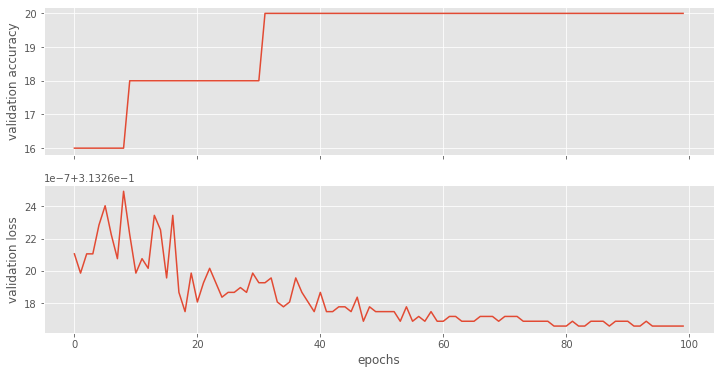

In [19]:
# Gráfica
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")